<a href="https://colab.research.google.com/github/taliahtarik/dsprojectjterm/blob/main/day2_exploratory_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
from google.colab import files
uploaded = files.upload()

Saving FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv to FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv


In [2]:
file = "FY_2024_Hospital_Readmissions_Reduction_Program_Hospital.csv"
data = pd.read_csv(file)

# ERR Visualization by State

In [5]:
import plotly.express as px

In [ ]:
state_err = data.groupby('State')['Excess Readmission Ratio'].mean().reset_index()
def err_category(err):
    if err < 1:
        return 'Below Expected (Green)'
    elif err == 1:
        return 'At Expected (Yellow)'
    else:
        return 'Above Expected (Red)'

In [ ]:
state_err['ERR Category'] = state_err['Excess Readmission Ratio'].apply(err_category)
state_err['Color'] = state_err['ERR Category'].map({
    'Below Expected (Green)': 'green',
    'At Expected (Yellow)': 'yellow',
    'Above Expected (Red)': 'red'})


fig = px.choropleth(
    state_err,
    locations='State',
    locationmode='USA-states',
    color='Excess Readmission Ratio',
    hover_name='State',
    hover_data={'Excess Readmission Ratio': True, 'ERR Category': True},
    color_continuous_scale=['green', 'yellow', 'red'],
    title="Average Excess Readmission Ratio (ERR) by State"
)
fig.update_geos(
    scope='usa',
    showcoastlines=True,
    coastlinecolor="Black",
    showland=True,
    landcolor="lightgray",
    projection_type="albers usa"
)

fig.show()

try specifically for virginia, which facilities have higher ERRs?


#Prediction Accuracy with a trendline (ignore below this)

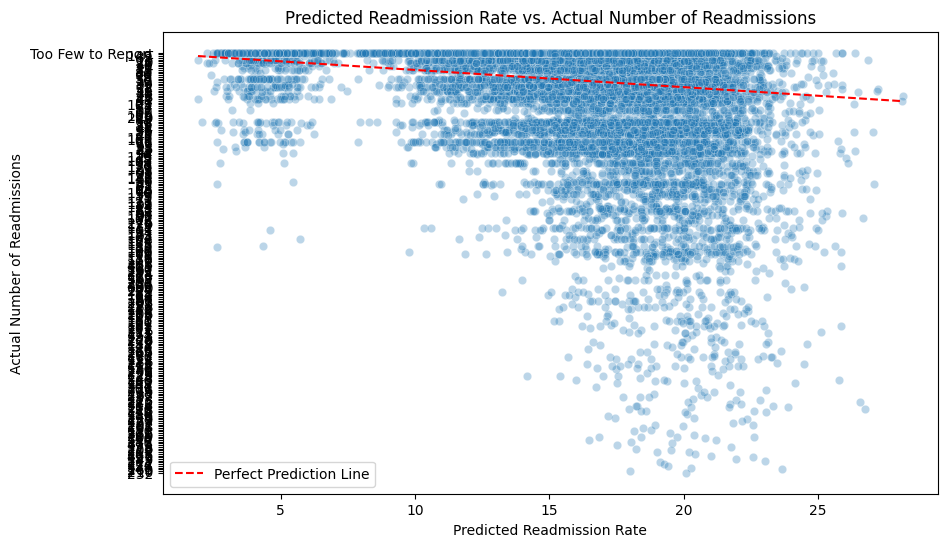

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.scatterplot(
    x = data['Predicted Readmission Rate'],
    y=data['Number of Readmissions'],
    alpha=0.3
)

plt.plot(
    [data['Predicted Readmission Rate'].min(), data['Predicted Readmission Rate'].max()],
    [data['Predicted Readmission Rate'].min(), data['Predicted Readmission Rate'].max()],
    color='red', linestyle='--', label="Perfect Prediction Line"
)

plt.title("Predicted Readmission Rate vs. Actual Number of Readmissions")
plt.xlabel("Predicted Readmission Rate")
plt.ylabel("Actual Number of Readmissions")
plt.legend()
plt.show()

nvm, let me see if i can declutter the y axis repping facilities


In [ ]:
# Ensure 'Number of Readmissions' is numeric, converting non-numeric to NaN
heart_failure_data['Number of Readmissions'] = pd.to_numeric(
    heart_failure_data['Number of Readmissions'], errors='coerce'
)
heart_failure_data['Predicted Readmission Rate'] = pd.to_numeric(
    heart_failure_data['Predicted Readmission Rate'], errors='coerce'
)

# Inspect for any non-numeric values (should be NaN after conversion)
print(heart_failure_data['Number of Readmissions'].isna().sum( ))
print(heart_failure_data['Predicted Readmission Rate'].isna().sum())

# Drop rows with NaN values in key columns
heart_failure_data = heart_failure_data.dropna(subset=['Number of Readmissions', 'Predicted Readmission Rate'])

# Repeat for Pneumonia Data
pneumonia_data['Number of Readmissions'] = pd.to_numeric(
    pneumonia_data['Number of Readmissions'], errors='coerce'
)
pneumonia_data['Predicted Readmission Rate'] = pd.to_numeric(
    pneumonia_data['Predicted Readmission Rate'], errors='coerce'
)
pneumonia_data = pneumonia_data.dropna(subset=['Number of Readmissions', 'Predicted Readmission Rate'])

# Verify that data is clean
print(heart_failure_data.info())
print(pneumonia_data.info())

# Aggregate Data by State
hf_state_aggregated = heart_failure_data.groupby('State').agg({
    'Predicted Readmission Rate': 'mean',
    'Number of Readmissions': 'sum'
}).reset_index()

pn_state_aggregated = pneumonia_data.groupby('State').agg({
    'Predicted Readmission Rate': 'mean',
    'Number of Readmissions': 'sum'
}).reset_index()

# Display results
print(hf_state_aggregated.head())
print(pn_state_aggregated.head())


824
494
<class 'pandas.core.frame.DataFrame'>
Index: 2305 entries, 1 to 18644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Facility Name               2305 non-null   object 
 1   Facility ID                 2305 non-null   int64  
 2   State                       2305 non-null   object 
 3   Measure Name                2305 non-null   object 
 4   Number of Discharges        2305 non-null   float64
 5   Footnote                    0 non-null      float64
 6   Excess Readmission Ratio    2305 non-null   float64
 7   Predicted Readmission Rate  2305 non-null   float64
 8   Expected Readmission Rate   2305 non-null   float64
 9   Number of Readmissions      2305 non-null   float64
 10  Start Date                  2305 non-null   object 
 11  End Date                    2305 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 234.1+ KB
None
<class 'pandas.core.fr

<ipython-input-27-ebf12ea8946d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-ebf12ea8946d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-ebf12ea8946d>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-27-ebf12e

In [6]:
import pandas as pd

columns_needed = ['State', 'Predicted Readmission Rate', 'Expected Readmission Rate']
data_filtered = data[columns_needed].dropna()

regions = {
    'Midwest': [
        'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota',
        'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'
    ],
    'West': [
        'Alaska', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana',
        'Nevada', 'Oregon', 'Utah', 'Washington', 'Wyoming'
    ],
    'Southeast': [
        'Alabama', 'Arkansas', 'Florida', 'Georgia', 'Kentucky', 'Louisiana',
        'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee', 'Virginia',
        'West Virginia'
    ],
    'Southwest': [
        'Arizona', 'New Mexico', 'Oklahoma', 'Texas'
    ],
    'Northeast': [
        'Connecticut', 'Delaware', 'Maine', 'Maryland', 'Massachusetts',
        'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania',
        'Rhode Island', 'Vermont', 'District of Columbia'
    ]
}

def assign_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Unknown'

state_codes = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi',
    'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York',
    'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia',
    'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'District of Columbia'
}
data_filtered['State Name'] = data_filtered['State'].map(state_codes)
data_filtered['Region'] = data_filtered['State Name'].apply(assign_region)

grouped_summary = data_filtered.groupby('Region')[
    ['Predicted Readmission Rate', 'Expected Readmission Rate']
].mean().reset_index()

melted_summary = grouped_summary.melt(
    id_vars='Region',
    value_vars=['Predicted Readmission Rate', 'Expected Readmission Rate'],
    var_name='Rate Type',
    value_name='Average Rate'
)

fig = px.bar(
    melted_summary,
    x='Region',
    y='Average Rate',
    color='Rate Type',
    barmode='group',
    title='Predicted vs. Expected Readmission Rates by Region',
    labels={'Average Rate': 'Rate (%)', 'Region': 'Region', 'Rate Type': 'Type of Rate'},
    text='Average Rate'
)

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(
    yaxis_title='Average Rate (%)',
    xaxis_title='Region',
    legend_title='Rate Type',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


The grouped bar chart comparing predicted vs. expected readmission rates across regions shows the disparities in hospital performance. By visualizing these differences, we can idenitfy which regions are exceding or falling short of the expected standard. In the graph, we can see thatthe Southeast has a higher predicted readmission rates compared to their expected rates, indicating challenges in achieving healthcare benchmarks. In contrast, the Northeast may show predicted rates closer to or below expected rates, suggesting stronger healthcare performance.

In [15]:
data_filtered['Difference'] = data_filtered['Predicted Readmission Rate'] - data_filtered['Expected Readmission Rate']

print("Statistical Analysis of Predicted vs Expected Readmission Rates by Region:")
for region in data_filtered['Region'].unique():
    regional_data = data_filtered[data_filtered['Region'] == region]['Difference']
    mean_diff = regional_data.mean()
    std_dev = regional_data.std()
    print(f"- {region}: Mean Difference = {mean_diff:.2f}, Std Deviation = {std_dev:.2f}")


Statistical Analysis of Predicted vs Expected Readmission Rates by Region:
- Southeast: Mean Difference = 0.11, Std Deviation = 1.01
- West: Mean Difference = -0.07, Std Deviation = 1.04
- Southwest: Mean Difference = -0.01, Std Deviation = 0.93
- Northeast: Mean Difference = 0.17, Std Deviation = 1.06
- Midwest: Mean Difference = -0.08, Std Deviation = 1.01


The Northeast has the highest mean difference at 0.17, indicating that predicted readmission rates in this region are slightly above expected rates, suggesting room for improvement. On the other hand, the Midwest has the lowest mean difference at -0.08, meaning hospitals in this region are performing better than expected on average. The large standard deviations, such as 1.06 in the Northeast and 1.01 in the Southeast, indicate significant variability within each region. For instance, while the Midwest has an overall negative mean difference, the variability suggests that some hospitals still exceed expected readmission rates.